# 正则化逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
datafile='data\ex2data2.txt'
data_matrix=np.loadtxt(datafile,delimiter=',')
X=np.array(data_matrix[:,:2])
y=np.array(data_matrix[:,2:])
X = np.insert(X, 0, 1, axis = 1)
m = y.size

### 绘制训练集数据视图

In [3]:
pos=np.array([i[:2] for i in data_matrix if i[2]])
neg=np.array([i[:2] for i in data_matrix if not i[2]])

In [4]:
def plot_data():
    plt.figure(figsize=(6,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='y=1')
    plt.plot(neg[:,0],neg[:,1],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

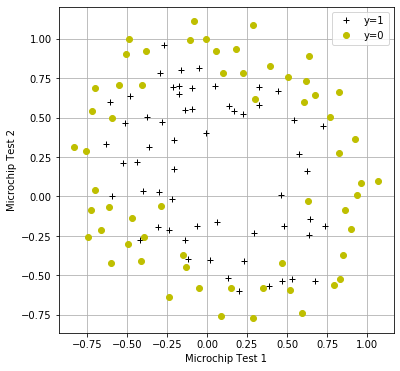

In [5]:
plot_data()

### 特征扩展

In [6]:
#此函数的目的在于把原本样本X的2个特征扩展到28个特征
def map_feature(x1,x2):
    degree=6
    out=np.ones((x1.shape[0],1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            tmp1=x1**(i-j)
            tmp2=x2**(j)
            tmp=(tmp1*tmp2).reshape(tmp1.shape[0],1) 
            out=np.hstack((out,tmp))
    return out

In [7]:
X_map=map_feature(X[:,1],X[:,2])    #X_map.shape=(118,28)

### 代价函数及求最优解函数

假设函数$ h_\theta (x)=\frac{1}{1+e^{-\theta ^T x}} $

代价函数$ J(\theta)=\frac{1}{m} \sum_{i=0}^m [-y^{(i)} \log (h_\theta (x^{(i)}))-(1-y^{(i)}) \log (1-h_\theta (x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta _j ^2 $

In [8]:
def h(theta,X):
    return 1./(1+np.exp(-np.dot(X,theta)))

def cost(theta,X,y,mylambda):
    tmp1=np.dot(-y.T,np.log(h(theta,X)))
    tmp2=-np.dot((1-y).T,np.log(1-h(theta,X)))
    reg=(mylambda/2)*np.dot(theta[1:].T,theta[1:])    #跳过theta0
    return float(1./m*(tmp1+tmp2+reg))

In [9]:
theta_init=np.zeros((X_map.shape[1],1))
cost(theta_init,X_map,y,0)

0.6931471805599453

In [10]:
#使用minimize函数直接求出最优解
def opt(theta,X,y,mylambda):
    result=optimize.minimize(cost,x0=theta,args=(X,y,mylambda),method='BFGS',options={"maxiter":500,"disp":False})
    return np.array([result.x]),result.fun

### 绘制决策边界

In [11]:
def plot_decision_boundary(theta,X,y,mylambda):
    #先运行opt函数求得最优解时的theta值theta_opt
    theta_opt,min_cost=opt(theta,X,y,mylambda)
    
    xx=np.linspace(-1,1.5,50)
    yy=np.linspace(-1,1.5,50)
    zz=np.zeros((len(xx),len(yy)))
    for i in range(len(xx)):
        for j in range(len(yy)):
            feature=map_feature(np.array([xx[i]]),np.array([yy[j]]))
            zz[i][j]=np.dot(theta_opt,feature.T)
    zz=zz.transpose()
    
    plt.contour(xx,yy,zz,[0])
    plt.title('Decision Boundary: lambda={0}'.format(mylambda))

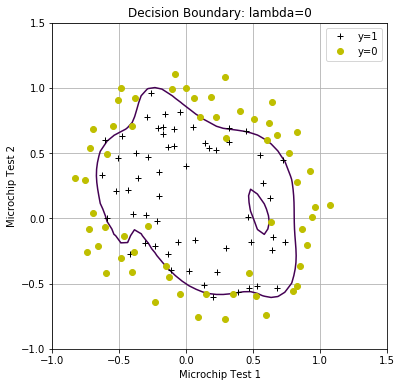

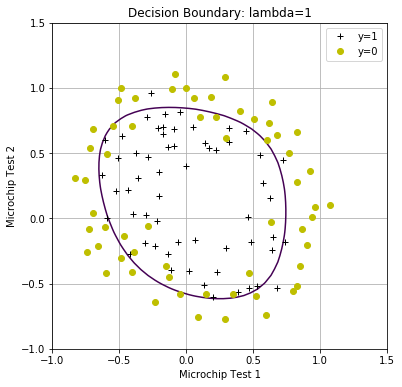

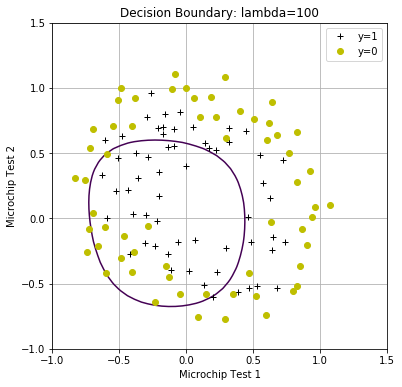

In [12]:
#lambda=0时出现过拟合
plot_data()
plot_decision_boundary(theta_init,X_map,y,0)

#lambda=1时拟合程度较好
plot_data()
plot_decision_boundary(theta_init,X_map,y,1)

#lambda=100时出现明显的欠拟合
plot_data()
plot_decision_boundary(theta_init,X_map,y,100)